In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from desisim.templates import ELG, LRG
#from quickgen import ELG, LRG

ImportError: No module named desisim.templates

In [2]:
elg = ELG()
lrg = LRG(normfilter='decam2014-r')

NameError: name 'ELG' is not defined

In [3]:
eflux, wave, emeta = elg.make_templates(nmodel=1, nocolorcuts=True, mag=[23.0])

NameError: name 'elg' is not defined

In [4]:
lflux, _, lmeta = lrg.make_templates(nmodel=1, nocolorcuts=True, mag=[21.8])

NameError: name 'lrg' is not defined

In [5]:
lmeta

NameError: name 'lmeta' is not defined

In [6]:
emeta

NameError: name 'emeta' is not defined

NameError: name 'wave' is not defined

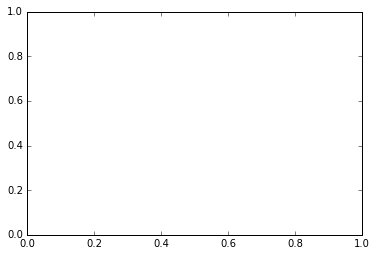

In [7]:
fig, ax = plt.subplots()
ax.plot(wave, eflux[0, :] + lflux[0, :], color='k', label="Composit")
ax.plot(wave, lflux[0, :], color='orange', label="LRG")
ax.plot(wave, eflux[0, :], color='cyan', label="ELG")
plt.legend(loc="best")
plt.ylim(0, 2E-17)

In [8]:
lflux2, _, lmeta2 = lrg.make_templates(nmodel=1, redshift=1.0, nocolorcuts=True, mag=[21.8])

NameError: name 'lrg' is not defined

In [9]:
eflux2, wave2, emeta2 = elg.make_templates(nmodel=1, redshift=1.4, nocolorcuts=True,  mag=[23.0])

NameError: name 'elg' is not defined

NameError: name 'wave2' is not defined

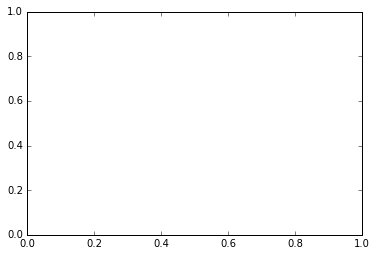

In [10]:
fig, ax = plt.subplots()
ax.plot(wave2, eflux2[0, :] + lflux2[0, :], color='k', label="Composit")
ax.plot(wave2, lflux2[0, :], color='orange', label="LRG")
ax.plot(wave2, eflux2[0, :], color='cyan', label="ELG")
plt.legend(loc="best")
plt.ylim(0, 2E-17)

In [11]:
lflux3, _, lmeta3 = lrg.make_templates(nmodel=1, redshift=0.5, nocolorcuts=True, mag=[21.2])

NameError: name 'lrg' is not defined

In [12]:
eflux3, wave3, emeta3 = elg.make_templates(nmodel=1, redshift=0.7, nocolorcuts=True,  mag=[23.0])

NameError: name 'elg' is not defined

NameError: name 'wave3' is not defined

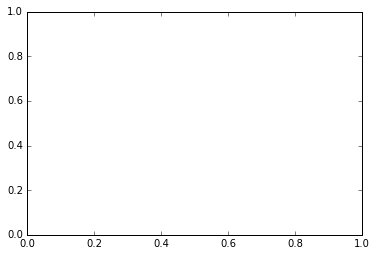

In [13]:
fig, ax = plt.subplots()
ax.plot(wave3, eflux3[0, :] + lflux3[0, :], color='k', label="Composit")
ax.plot(wave3, lflux3[0, :], color='orange', label="LRG")
ax.plot(wave3, eflux3[0, :], color='cyan', label="ELG")
plt.legend(loc="best")
plt.ylim(0, 2E-17)

In [14]:
lflux4, _, lmeta4 = lrg.make_templates(nmodel=1, redshift=1.1, nocolorcuts=True, mag=[21.8])

NameError: name 'lrg' is not defined

In [15]:
eflux4, wave4, emeta4 = elg.make_templates(nmodel=1, redshift=0.5, nocolorcuts=True,  mag=[23.0])

NameError: name 'elg' is not defined

NameError: name 'wave4' is not defined

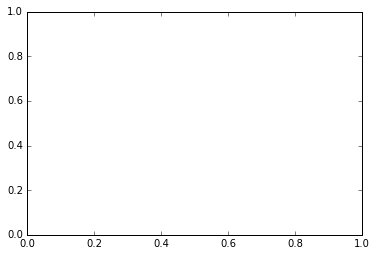

In [16]:
fig, ax = plt.subplots()
ax.plot(wave4, eflux4[0, :] + lflux3[0, :], color='k', label="Composit")
ax.plot(wave4, lflux4[0, :], color='orange', label="LRG")
ax.plot(wave4, eflux4[0, :], color='cyan', label="ELG")
plt.legend(loc="best")
plt.ylim(0, 2E-17)

In [17]:
lflux5, _, lmeta5 = lrg.make_templates(nmodel=1, redshift=0.5, nocolorcuts=True, mag=[21.2])

NameError: name 'lrg' is not defined

In [18]:
eflux5, wave5, emeta5 = elg.make_templates(nmodel=1, redshift=0.5, nocolorcuts=True,  mag=[23.0])

NameError: name 'elg' is not defined

NameError: name 'wave4' is not defined

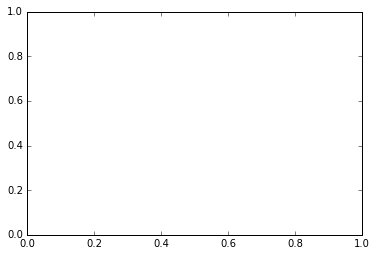

In [19]:
fig, ax = plt.subplots()
ax.plot(wave4, eflux4[0, :] + lflux3[0, :], color='k', label="Composit")
ax.plot(wave4, lflux4[0, :], color='orange', label="LRG")
ax.plot(wave4, eflux4[0, :], color='cyan', label="ELG")
plt.legend(loc="best")
plt.ylim(0, 2E-17)